In [18]:
import pandas as pd
import numpy as np

In [2]:
ls

application_record.csv.zip*  credit_record.csv.zip*  Solution.ipynb*
catboost_info/               logs.log*


In [3]:
data0=pd.read_csv('application_record.csv.zip')
data1=pd.read_csv('credit_record.csv.zip')

# Task
Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of 'good' or 'bad' is not given. You should use some techique, such as vintage analysis to construct you label. Also, unbalance data problem is a big problem in this task.



In [4]:
data0

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [5]:
data1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [6]:
data1.MONTHS_BALANCE.value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

In [7]:
data2=pd.DataFrame(data1.groupby(['ID'])['MONTHS_BALANCE'].agg(min))
data2.rename(columns={'MONTHS_BALANCE':'START_MONTH'},inplace=True)

In [8]:
#Target Variable Generation
data3= pd.merge(data0,data2,on='ID',how='left')



In [9]:
data3

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,START_MONTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0,NaN
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0,NaN


In [10]:
data1.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [11]:
len(data1.ID.unique())

45985

0: 1-29 days past due 1: 30-59 days past due 2: 60-89 days overdue 3: 90-119 days overdue 4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days C: paid off that month X: No loan for the month

In [12]:
# set risky users as useres with more than 60 days overdue.
risk= ['1','2','3','4','5']
data1['CUTOFF']='GOOD'
data1['CUTOFF'][data1['STATUS'].isin(risk)]='BAD'

/tmp/ipykernel_90881/1585170373.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CUTOFF'][data1['STATUS'].isin(risk)]='BAD'


In [14]:
data11=data1.value_counts(subset=['ID', 'CUTOFF']).unstack(fill_value=0)

In [19]:
data11['TARGET']=np.nan
data11.loc[(data11['GOOD'] > data11['BAD']), 'TARGET'] = 1
data11.loc[(data11['GOOD'] <= data11['BAD']), 'TARGET'] = 0

In [22]:
data11.reset_index(inplace=True)

In [23]:
data11['TARGET'].value_counts(normalize=True)

1.0    0.995977
0.0    0.004023
Name: TARGET, dtype: float64

In [24]:
data3=pd.merge(data3,data11[['ID','TARGET']],how='inner',on='ID')

In [25]:
data3.head(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,START_MONTH,TARGET
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,1.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,1.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,1.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,1.0


In [26]:
data3.NAME_HOUSING_TYPE.value_counts()

House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64

In [27]:
import klib

GridSpec(6, 8)

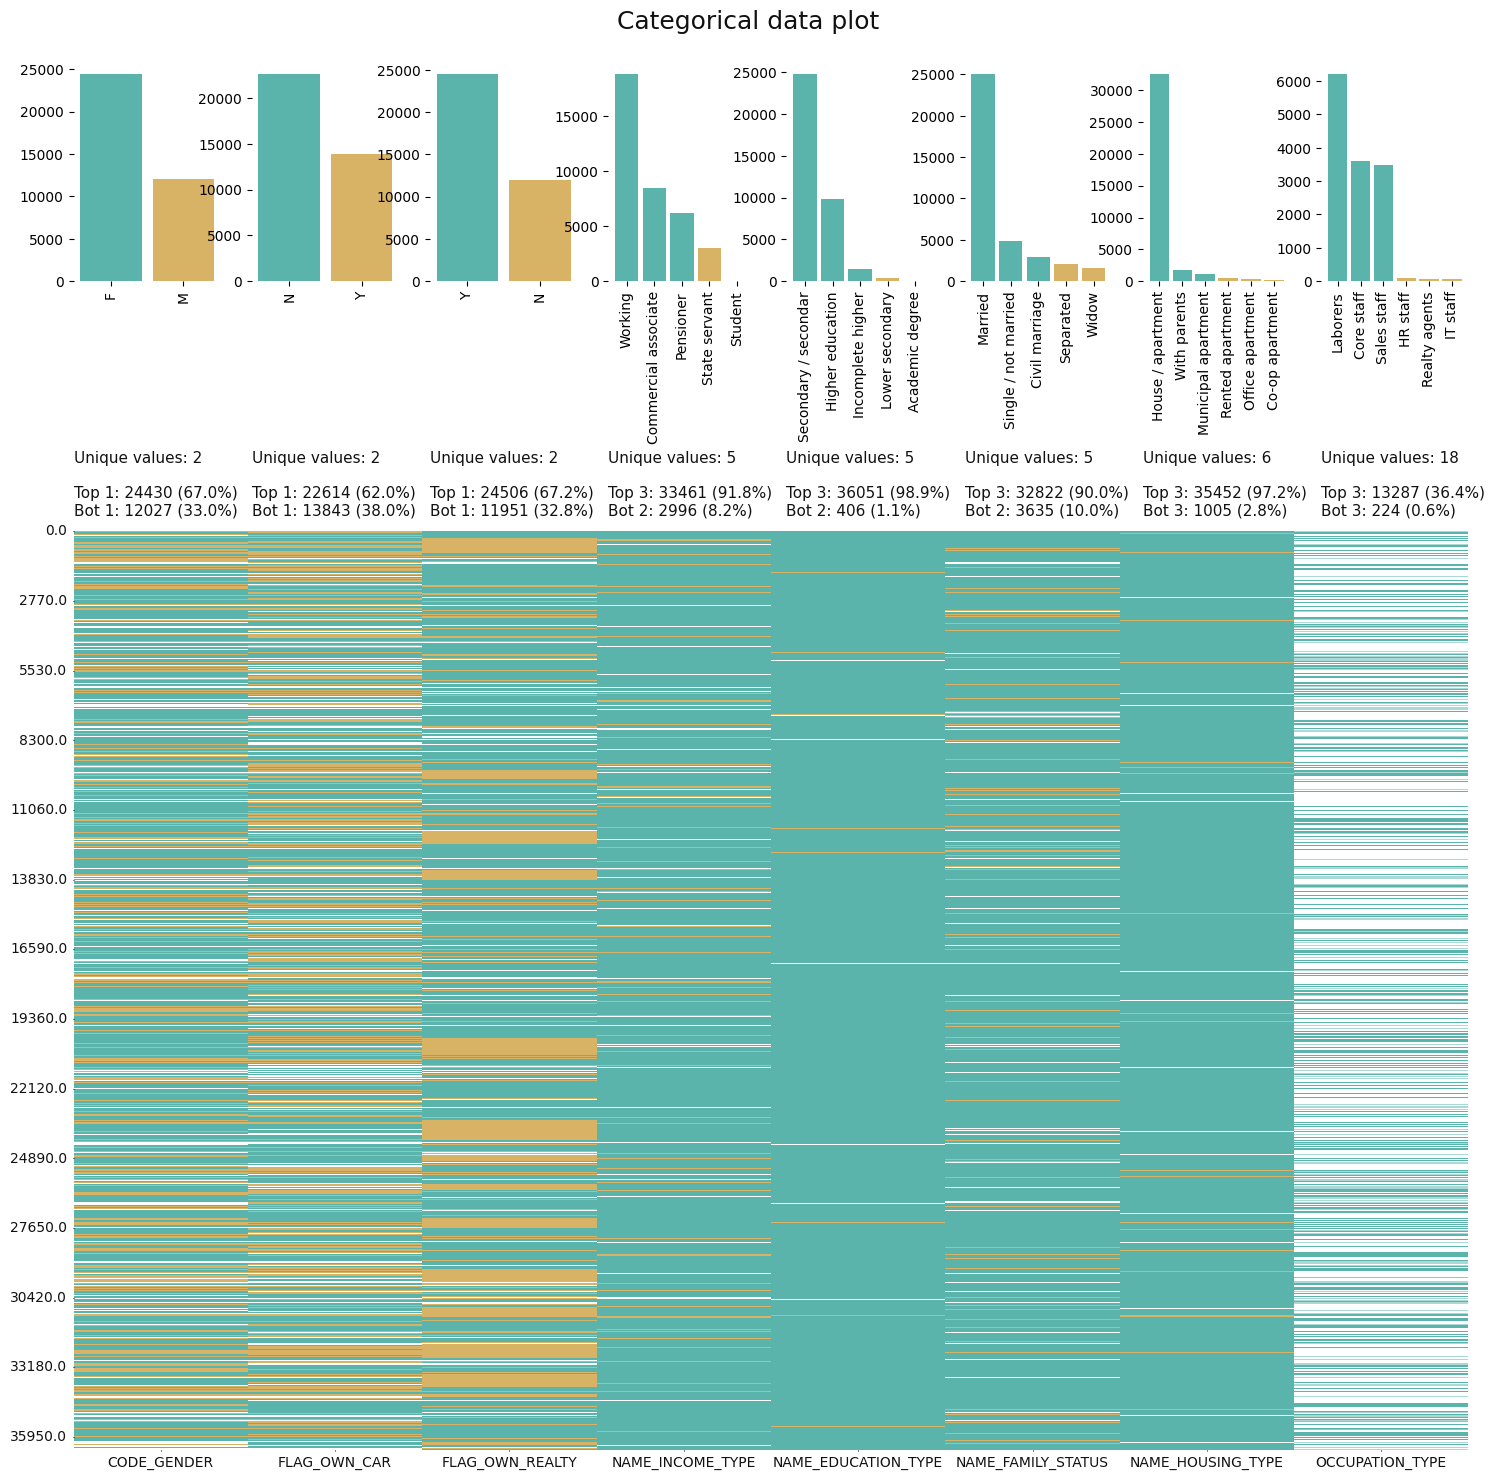

In [28]:
klib.cat_plot(data3)

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='START_MONTH', ylabel='Density'>

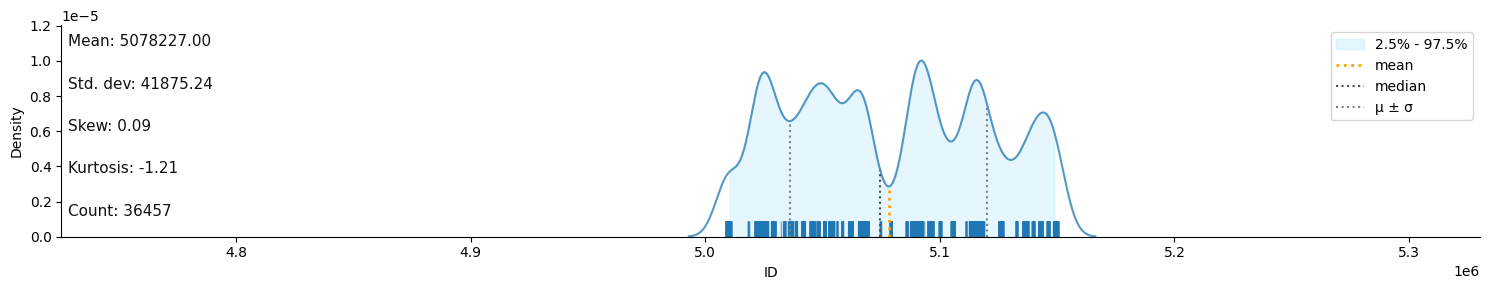

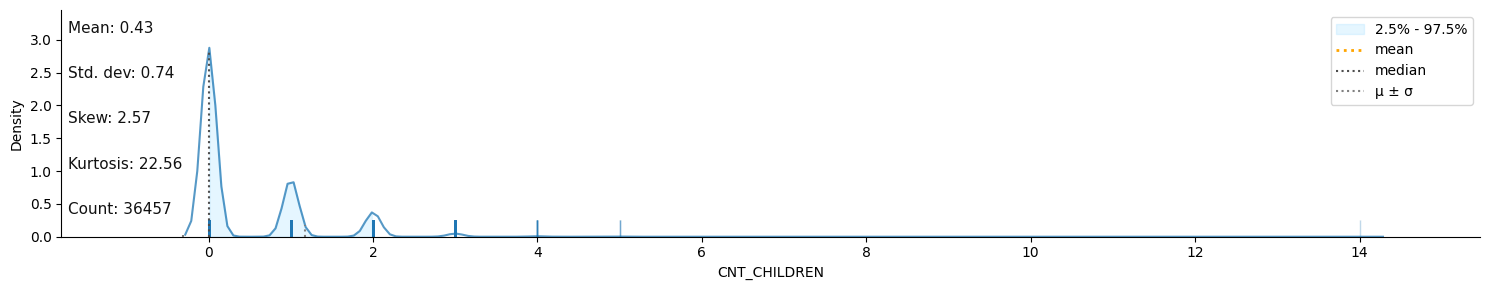

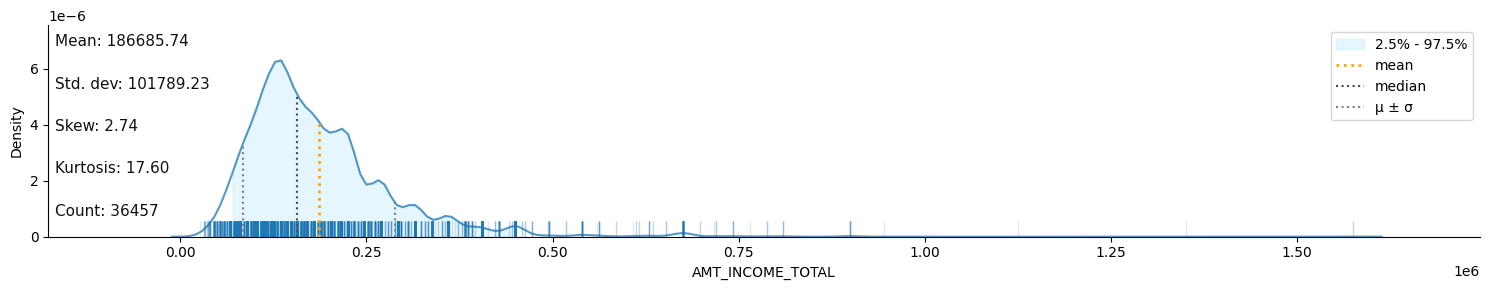

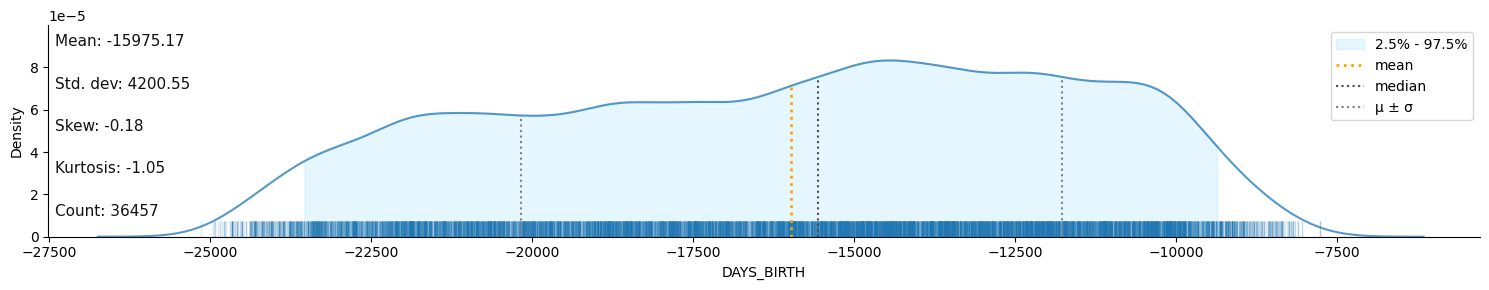

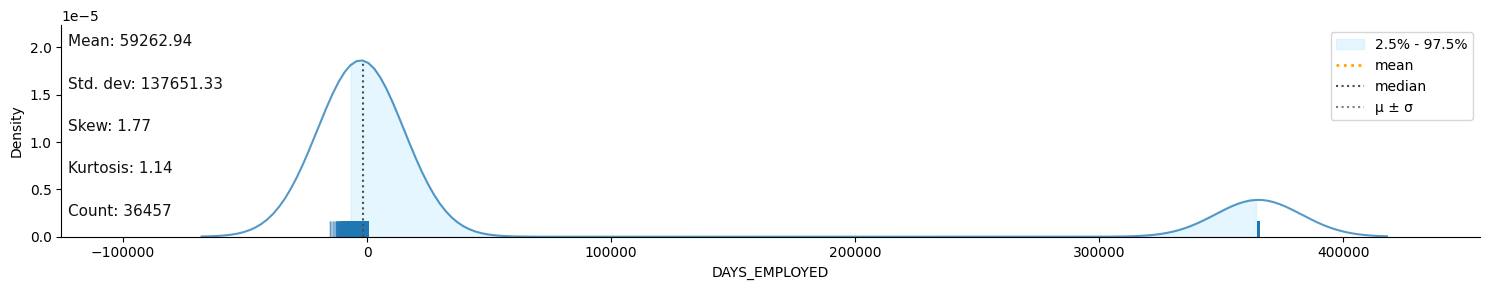

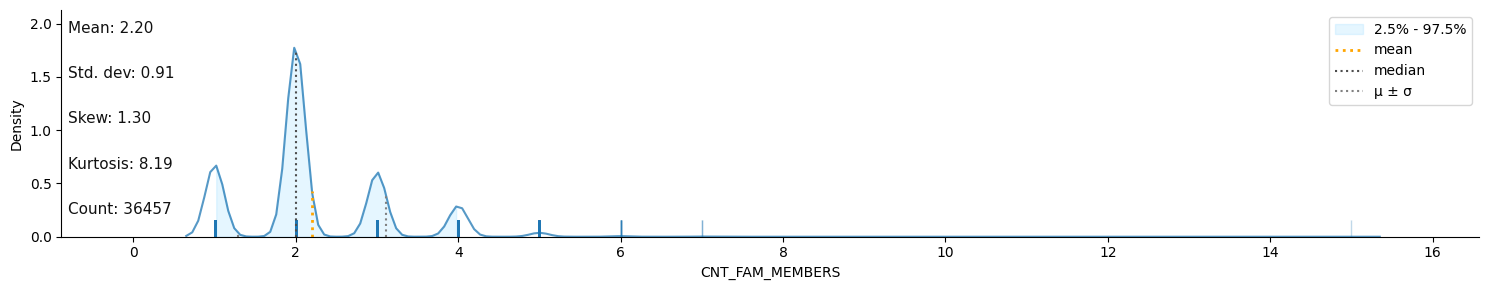

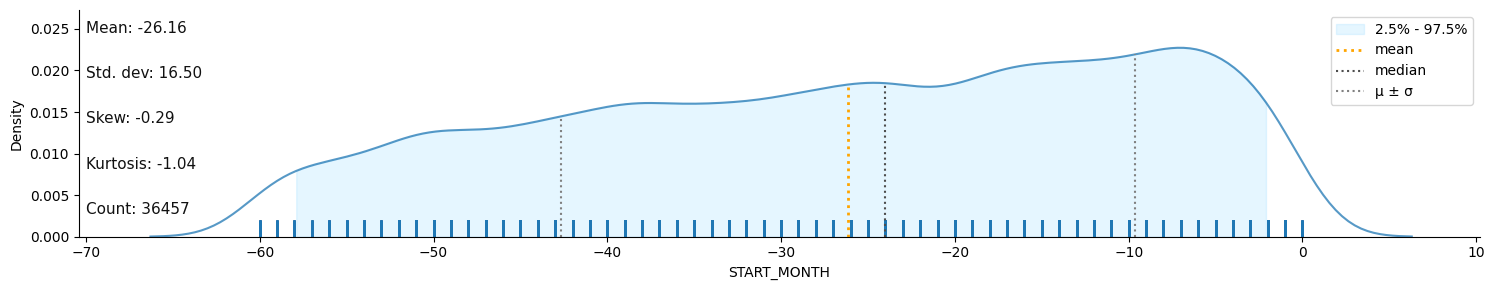

In [29]:
klib.dist_plot(data3)

<AxesSubplot:>

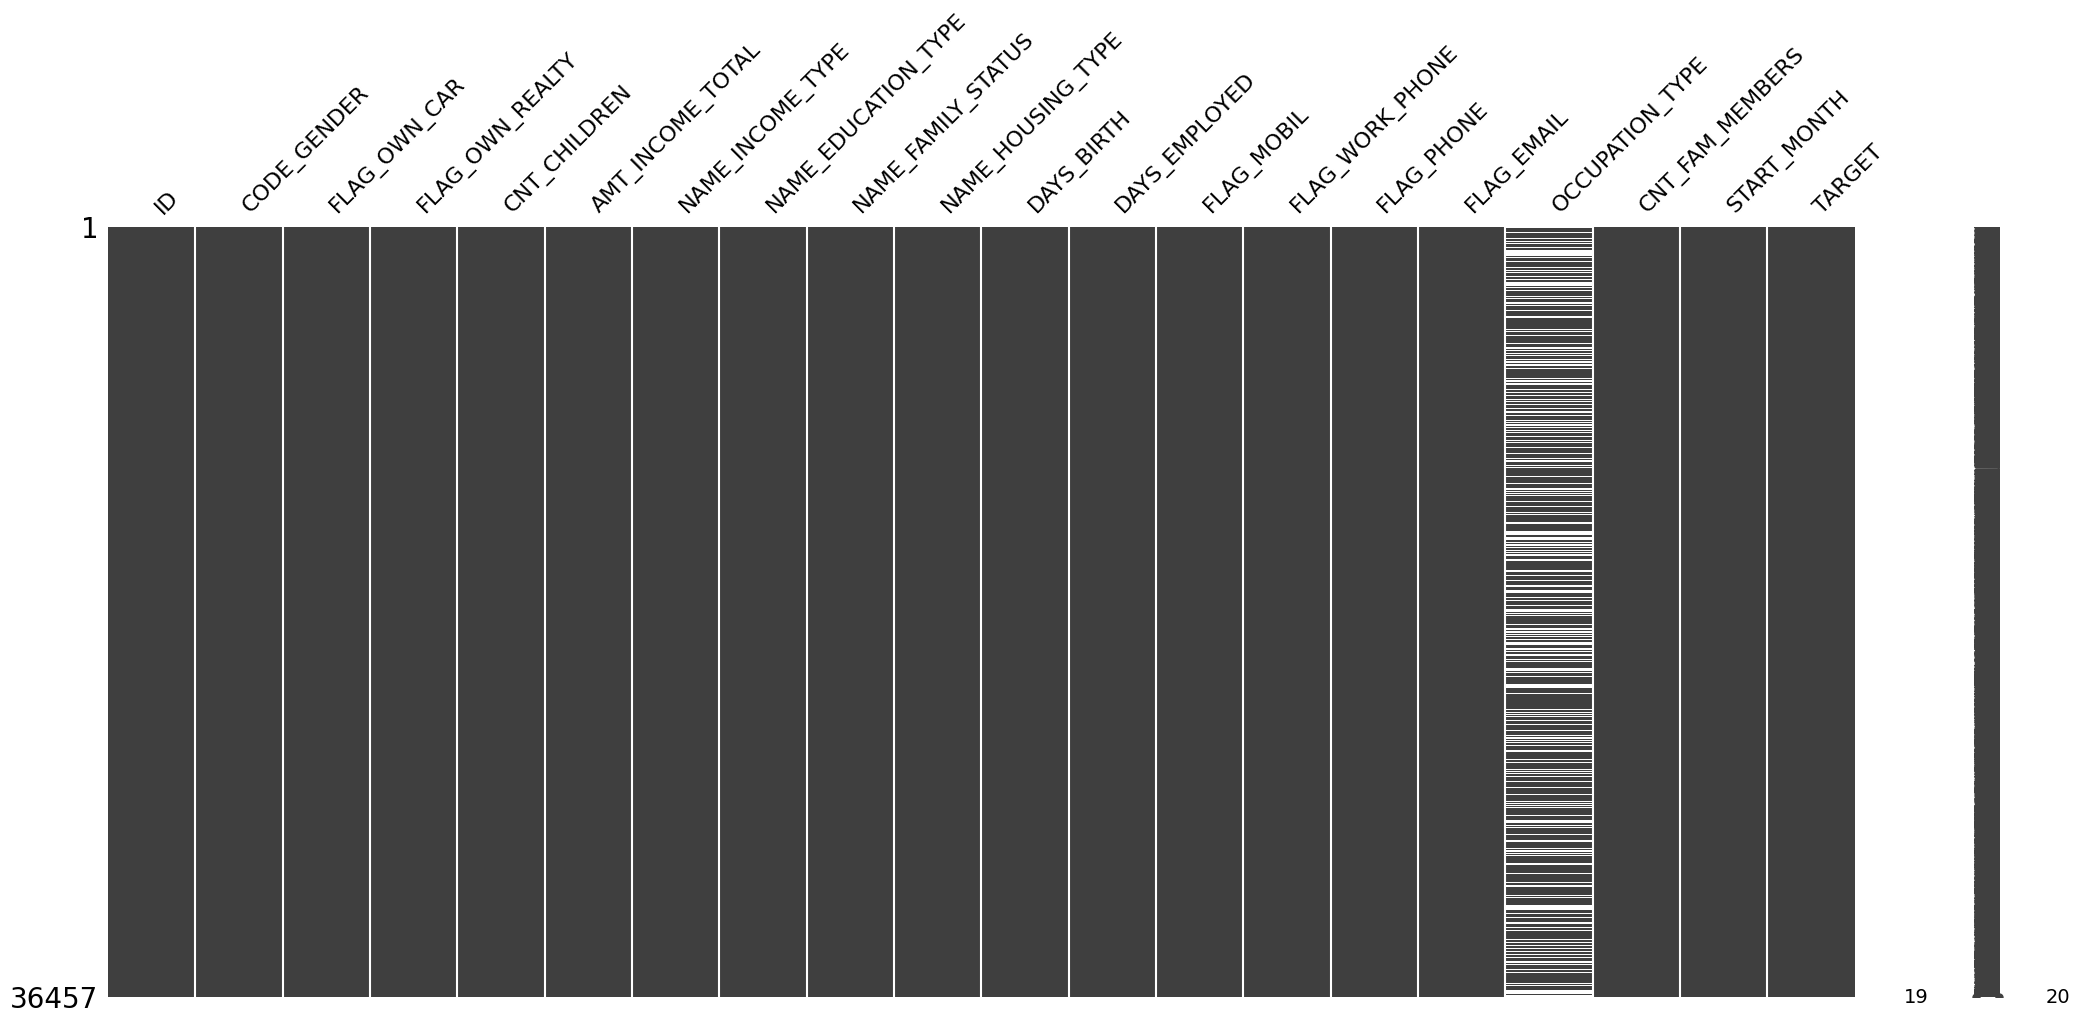

In [30]:
import missingno
missingno.matrix(data3)

we will be utilizing pycaret library for quick robust ML pipeline

![image.png](attachment:37fcab17-6c8c-4189-b60b-0f95db6a56ef.png)

In [31]:
from pycaret.classification import *

In [32]:
ss = setup(data=data3,train_size=0.8,target='TARGET',ignore_features=['ID'],use_gpu=True
           ,fix_imbalance=True,silent=True)

,Description,Value
0,session_id,8960
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(36457, 20)"
5,Missing Values,True
6,Numeric Features,5
7,Categorical Features,13
8,Ordinal Features,False
9,High Cardinality Features,False


In [33]:
cat=create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9959,0.6366,1.0000,0.9959,0.9979,0.0000,0.0000
1,0.9952,0.5510,0.9993,0.9959,0.9976,-0.0012,-0.0017
2,0.9952,0.7172,0.9993,0.9959,0.9976,-0.0012,-0.0017
3,0.9952,0.6592,0.9993,0.9959,0.9976,-0.0012,-0.0017
4,0.9962,0.7860,0.9997,0.9966,0.9981,0.2655,0.3321
5,0.9945,0.5421,0.9983,0.9962,0.9972,-0.0024,-0.0026
6,0.9952,0.5333,0.9990,0.9962,0.9976,0.1232,0.1424
7,0.9959,0.8041,0.9993,0.9966,0.9979,0.2485,0.2871
8,0.9949,0.7035,0.9990,0.9959,0.9974,-0.0016,-0.0021


In [34]:
# cat=create_model('catboost')
xgb=create_model('xgboost')
rf=create_model('rf')
et=create_model('et')
lgbm=create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9962,0.7166,1.0000,0.9962,0.9981,0.1533,0.2881
1,0.9952,0.5794,0.9993,0.9959,0.9976,-0.0012,-0.0017
2,0.9955,0.6903,0.9997,0.9959,0.9978,-0.0006,-0.0012
3,0.9952,0.6378,0.9993,0.9959,0.9976,-0.0012,-0.0017
4,0.9959,0.7064,0.9993,0.9966,0.9979,0.2485,0.2871
5,0.9952,0.6191,0.9990,0.9962,0.9976,-0.0016,-0.0020
6,0.9955,0.5976,0.9993,0.9962,0.9978,0.1319,0.1650
7,0.9945,0.7888,0.9983,0.9962,0.9972,0.1087,0.1153
8,0.9952,0.7280,0.9993,0.9959,0.9976,-0.0012,-0.0017


In [35]:
blend = blend_models([cat,xgb,rf,et,lgbm],fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9955,0.6798,0.9993,0.9962,0.9978,0.0701,0.0916
1,0.9954,0.7336,0.9995,0.9959,0.9977,-0.0009,-0.0015
2,0.9955,0.6332,0.9993,0.9962,0.9978,0.1319,0.1650
3,0.9950,0.7709,0.9986,0.9964,0.9975,0.1693,0.1824
4,0.9954,0.7074,0.9988,0.9966,0.9977,0.2266,0.2441
Mean,0.9954,0.7050,0.9991,0.9963,0.9977,0.1194,0.1363
Std,0.0002,0.0468,0.0003,0.0002,0.0001,0.0788,0.0843


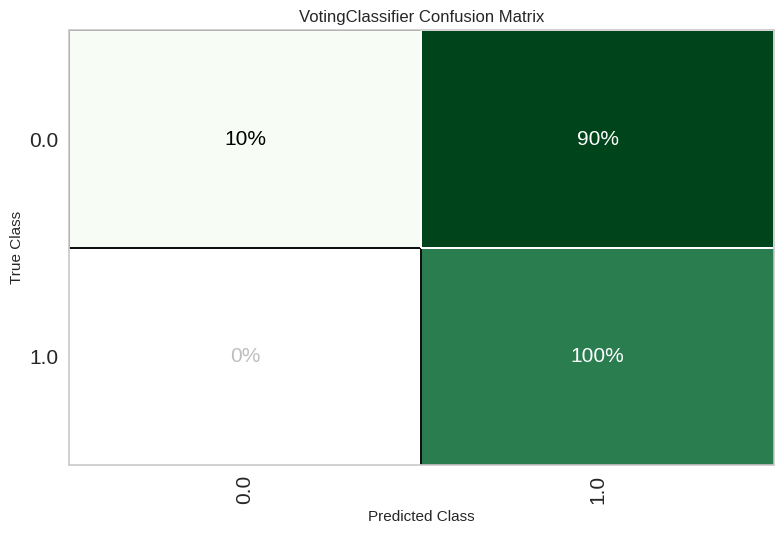

In [36]:
plot_model(blend, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

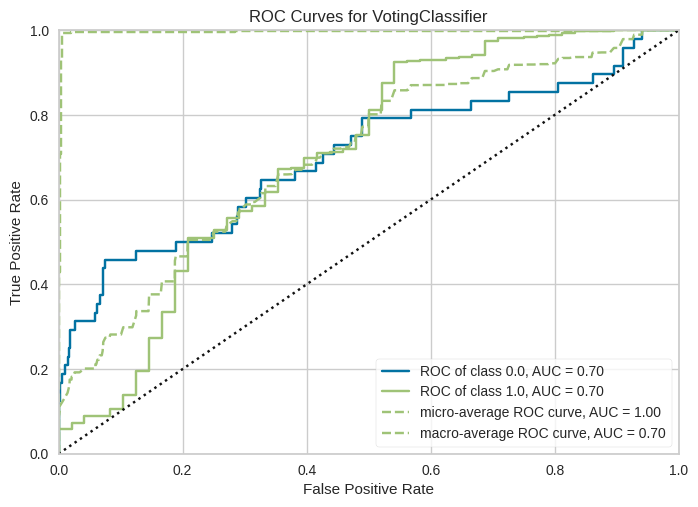

In [37]:
plot_model(blend,'auc')

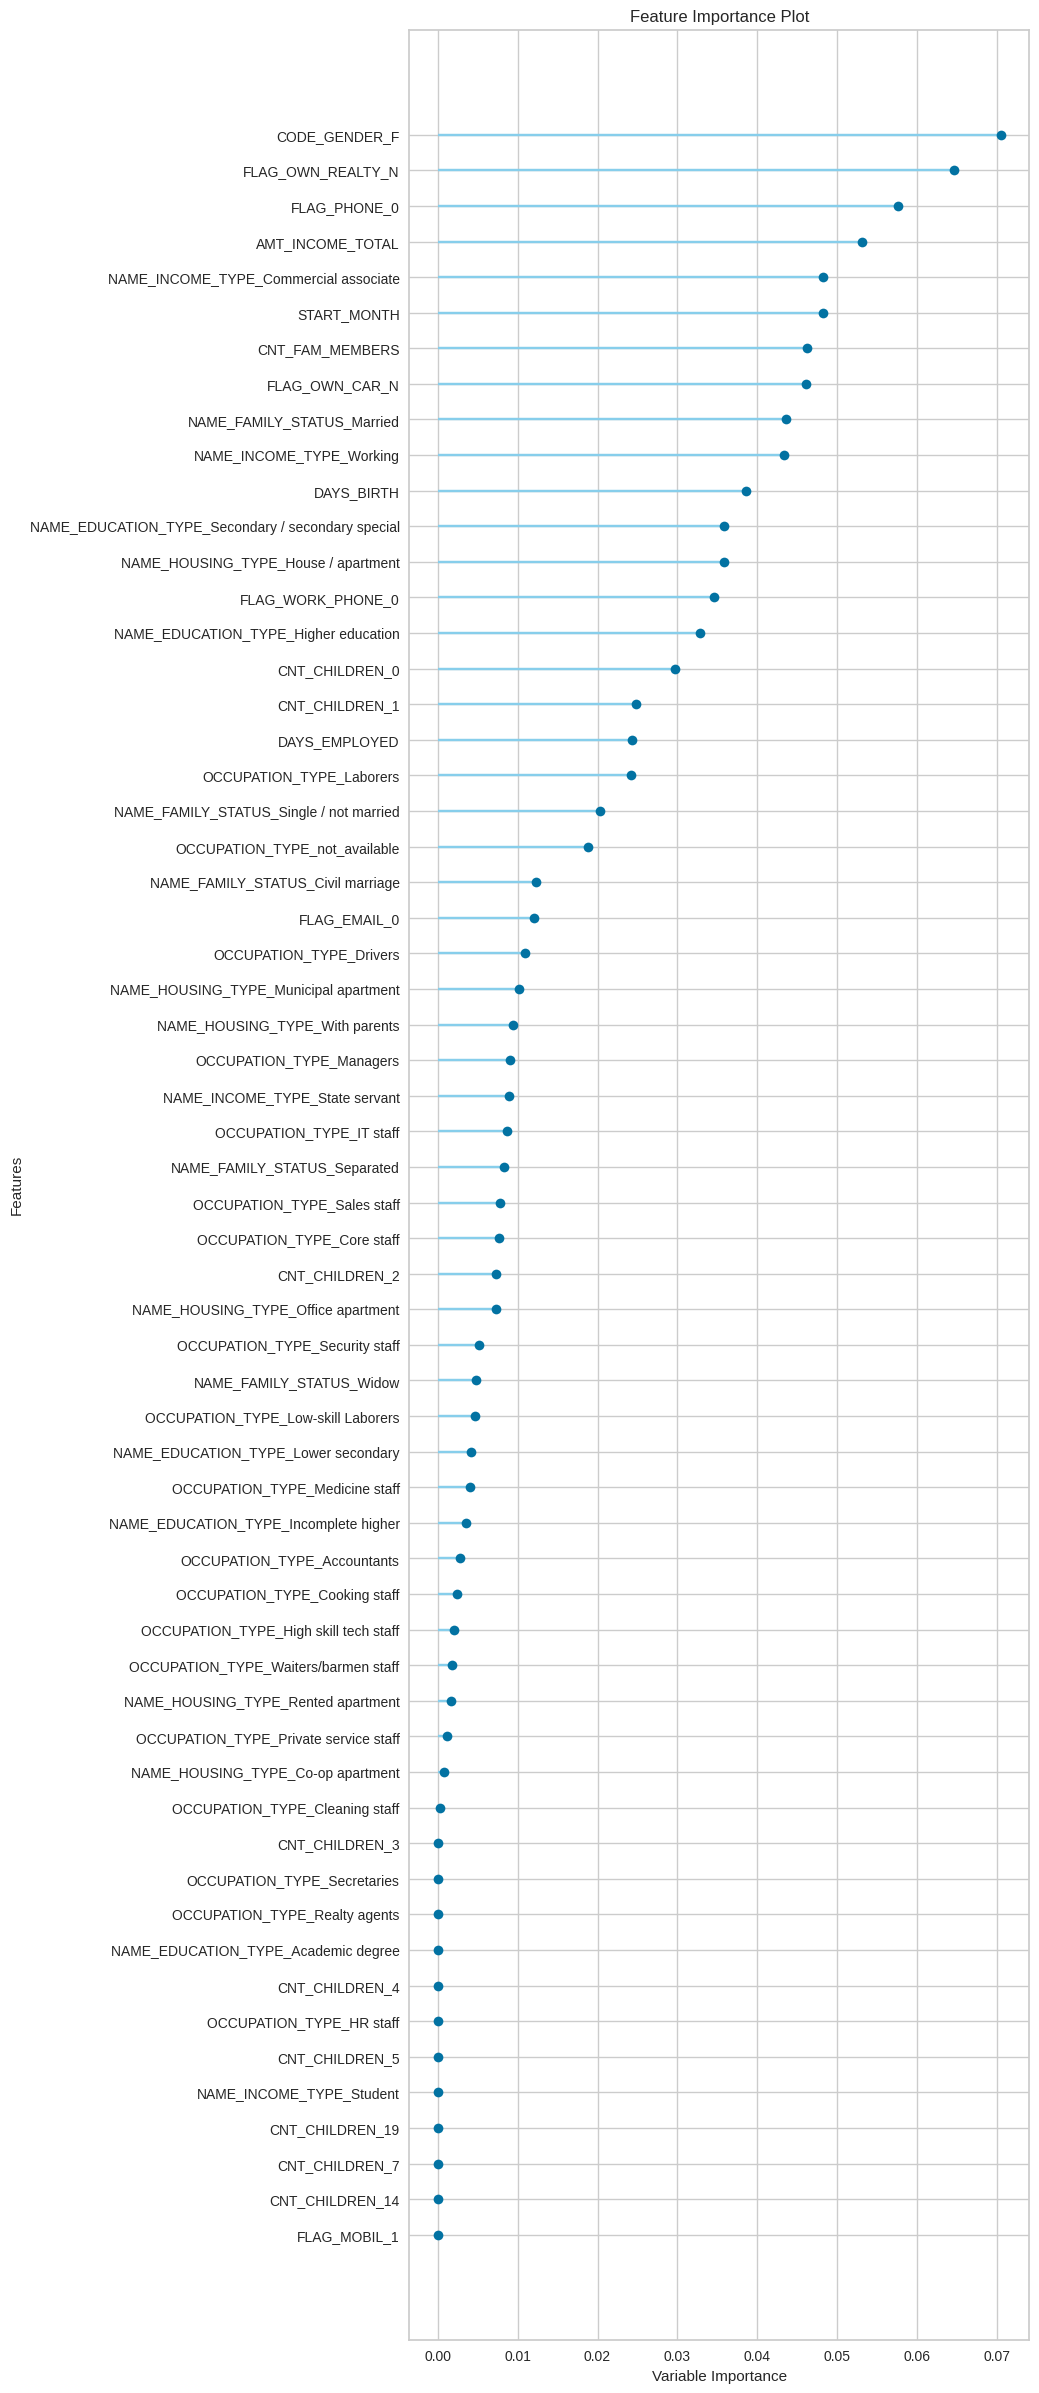

In [38]:
plot_model(rf,'feature_all')

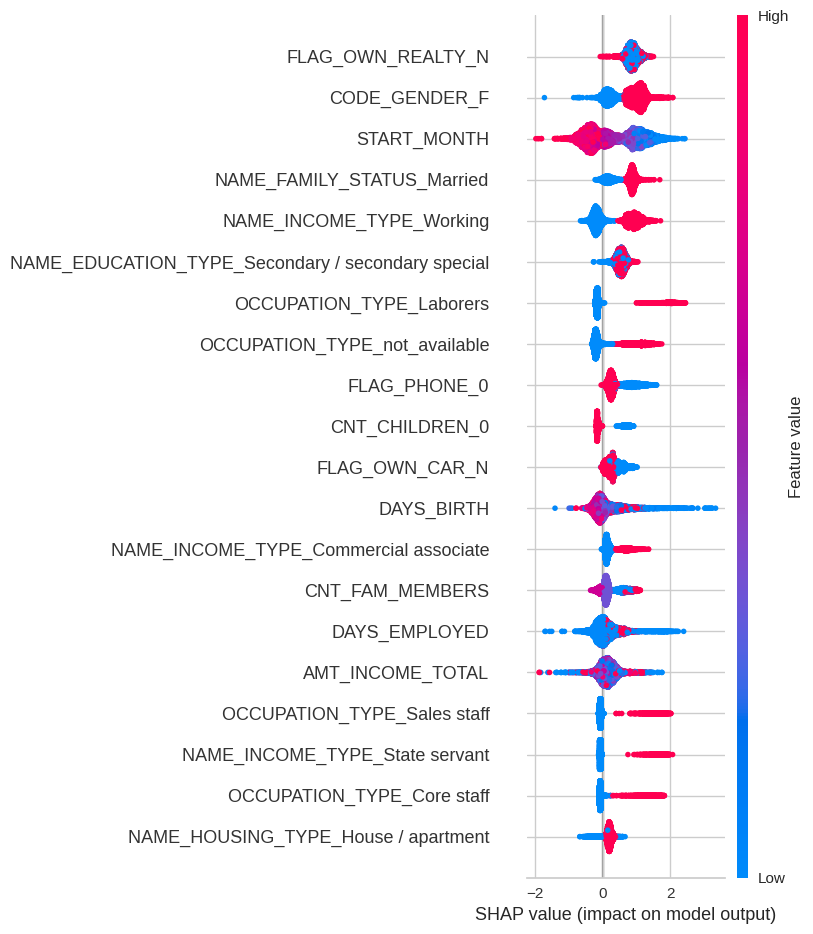

In [39]:
interpret_model(cat,'summary')

In [40]:
print(blend)

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x7f5bc7f58df0>),
                             ('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=0, grow_policy='dep...
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                       

## i recommend using the blended model , which consists of a voting classifier on catboost, xgboost
